<a href="https://colab.research.google.com/github/Amal-Alalami/Projects-CV/blob/main/CNN_MedianBlure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# to generate data
from keras.preprocessing.image import ImageDataGenerator

# to build model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
%matplotlib inline

# Upload Dataset

In [2]:
!7z x archive.zip



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 35779075 bytes (35 MiB)

Extracting archive: archive.zip
 64% 4096 Open              --
Path = archive.zip
Type = zip
Physical Size = 35779075

  0%     11% 751 - Alzheimer_s Dataset/test/NonDemented/32 (28).jpg                                                            21% 1438 - Alzheimer_s Dataset/train/MildDemented/mildDem241.jpg                                                                  30% 2021 - Alzheimer_s Dataset/train/Mod

# **Pre-processed data and Visualize Sample Images**

In [28]:
# Method to print sample images from each class

def print_sample_images(train_path, class_labels):

  plt.figure(figsize=(10, 10))
  for i, class_name in enumerate(class_labels):

    # Get a random image from the class directory
    img_name = np.random.choice(os.listdir(os.path.join(train_path, class_name)))
    img_path = os.path.join(train_path, class_name, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

  plt.show()

**Sample of train images before pre-processing data from each class**

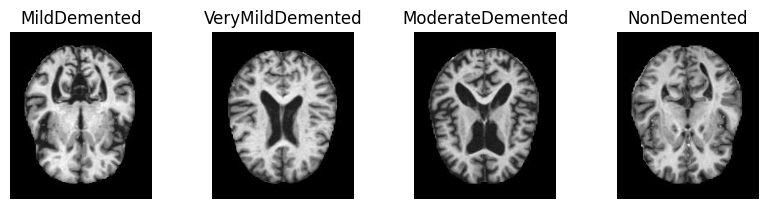

In [29]:
train_dir = '/content/Alzheimer_s Dataset/train'
class_names = os.listdir('/content/Alzheimer_s Dataset/train')
print_sample_images(train_dir, class_names)

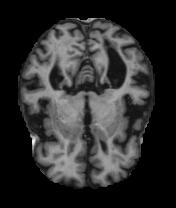

In [5]:
img = cv2.imread('/content/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
cv2_imshow(img)

In [ ]:
'''image = cv2.imread('/content/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

kernel_size = (7, 7)

# Apply mean filter
filtered_image = cv2.blur(gray_img, kernel_size)
cv2_imshow(filtered_image)
# Optional: convert back to uint8 format for visualization or further processing
#filtered_image_uint8 = cv2.convertScaleAbs(filtered_image)'''

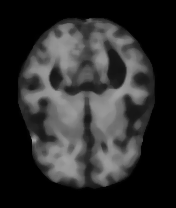

In [26]:
im = cv2.imread('/content/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2BGRA)
kernel_size = 7 # Example kernel size
filtered_image = cv2.medianBlur(gray_im, kernel_size)

cv2_imshow(filtered_image)

In [ ]:
'''def create_log_gabor_kernel(ksize, frequency, theta, sigma_x, sigma_y, gamma=1):
  kernel = cv2.getGaborKernel(ksize, sigma_x, theta, frequency, gamma, 0, cv2.CV_32F)  # Create Gabor kernel
  kernel = np.log(kernel + 1)  # Apply log function for Log-Gabor filter

  return kernel'''

In [ ]:
'''image = cv2.imread('/content/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to float32 for better precision
#image_f32 = cv2.convertTo(image, cv2.CV_32F)

# Define filter parameters
ksize = (31, 31)
frequency = 0.2
theta = np.pi/4
sigma_x = 10
sigma_y = 10

# Create the Log-Gabor kernel
kernel = create_log_gabor_kernel(ksize, frequency, theta, sigma_x, sigma_y)

# Apply the filter
filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
plt.imshow(filtered_image)'''

**Pre-processing data**

In [30]:
def process_images_in_folder(folder_path):

  kernel_size = 7
  for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)

    #pre-processing data using median filter (Noise Removal Methods)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    preprocessed_image = cv2.medianBlur(gray_image, kernel_size)

    # Save the pre-processed image with the same filename
    cv2.imwrite(image_path, preprocessed_image)

In [31]:
train_data_path = '/content/Alzheimer_s Dataset/train'
test_data_path = '/content/Alzheimer_s Dataset/test'
class_labels = os.listdir('/content/Alzheimer_s Dataset/train')


def data_to_be_processed(class_path ,class_labels):
  for class_label in class_labels:
    class_folder_path = os.path.join(class_path, class_label)
    process_images_in_folder(class_folder_path)



# train data
data_to_be_processed(train_data_path, class_labels)

# test data
data_to_be_processed(test_data_path, class_labels)

**Sample of train images after pre-processing data from each class**

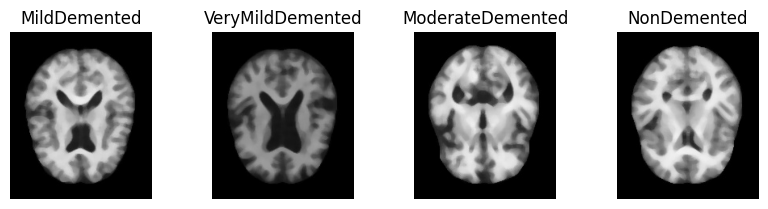

In [32]:
train_dir = '/content/Alzheimer_s Dataset/train'
class_names = os.listdir('/content/Alzheimer_s Dataset/train')
print_sample_images(train_dir, class_names)

# Images in train data

In [33]:
train_folder = '/content/Alzheimer_s Dataset/train'
class_names_train_folder = os.listdir(train_folder)
class_count = []

for class_name in class_names_train_folder:
  num_images = len(os.listdir(os.path.join(train_folder, class_name)))
  class_count.append(num_images)
  print(f"Class {class_name}: {num_images} images")


Class MildDemented: 717 images
Class VeryMildDemented: 1792 images
Class ModerateDemented: 52 images
Class NonDemented: 2560 images


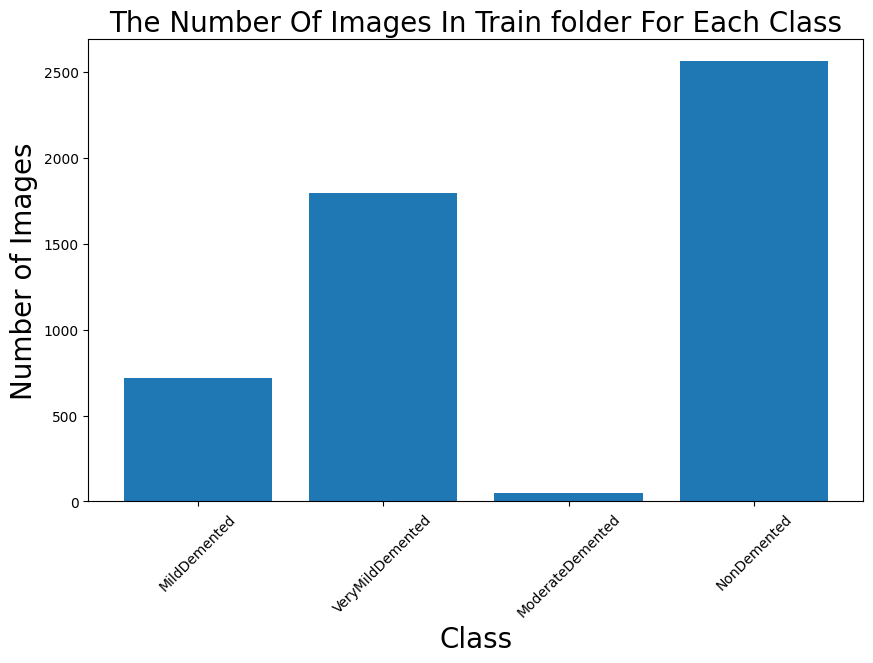

In [34]:

plt.figure(figsize=(10, 6))
plt.bar(class_names_train_folder, class_count)

plt.title('The Number Of Images In Train folder For Each Class', fontsize=20)
plt.xlabel("Class", fontsize = 20)
plt.ylabel("Number of Images", fontsize=20)
plt.xticks(rotation=45)

plt.show()


# **Train Test split and Build Model**

In [35]:
#  Loads all images and labels from a directory and converts them to a NumPy array.

def load_train_data(data_dir):

  image_width, image_height = 128, 128
  class_names = os.listdir(data_dir)
  class_name_to_label = {class_name: i for i, class_name in enumerate(class_names)}
  images = []
  labels = []

  for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_path):

      image_path = os.path.join(class_path, filename)
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
      image = cv2.resize(image, (image_width, image_height))
      image = image / 255.0 #normalize

      label = class_name_to_label[class_name]
      images.append(image)
      labels.append(label)

  # Convert the list of images to a NumPy array
  X_train = np.asarray(images)
  Y_train = np.asarray(labels)

  return X_train, Y_train

In [36]:
X_train , Y_train = load_train_data('/content/Alzheimer_s Dataset/train')

In [37]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

X_train shape: (5121, 128, 128)
Y_train shape: (5121,)


In [38]:
Y_train

array([0, 0, 0, ..., 3, 3, 3])

In [39]:
Y_train = tf.keras.utils.to_categorical(Y_train)

In [40]:
Y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [41]:
print(Y_train.shape)

(5121, 4)


In [42]:
X_test , Y_test = load_train_data('/content/Alzheimer_s Dataset/test')

In [43]:
print(f"X_test original shape: {X_test.shape}")
print(f"Y_test original shape: {Y_test.shape}")

X_test original shape: (1279, 128, 128)
Y_test original shape: (1279,)


In [44]:
Y_test

array([0, 0, 0, ..., 3, 3, 3])

In [45]:
Y_test_cat = tf.keras.utils.to_categorical(Y_test)

In [46]:
print(Y_test_cat.shape)

(1279, 4)


In [47]:
Y_test_cat

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [48]:
# CNN model
model1 = Sequential()
inputSize = (128,128,1)

#ilters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')
model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=inputSize, activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(4, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [49]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0

In [50]:
results = model1.fit(X_train, Y_train, epochs=35)

Epoch 1/35
161/161 [==============================] - 99s 601ms/step - loss: 0.9800 - accuracy: 0.5362
Epoch 2/35
161/161 [==============================] - 92s 573ms/step - loss: 0.8326 - accuracy: 0.6134
Epoch 3/35
161/161 [==============================] - 90s 558ms/step - loss: 0.6298 - accuracy: 0.7293
Epoch 4/35
161/161 [==============================] - 89s 553ms/step - loss: 0.4126 - accuracy: 0.8364
Epoch 5/35
161/161 [==============================] - 90s 558ms/step - loss: 0.2610 - accuracy: 0.8988
Epoch 6/35
161/161 [==============================] - 90s 558ms/step - loss: 0.1510 - accuracy: 0.9438
Epoch 7/35
161/161 [==============================] - 88s 548ms/step - loss: 0.1148 - accuracy: 0.9574
Epoch 8/35
161/161 [==============================] - 90s 555ms/step - loss: 0.0352 - accuracy: 0.9906
Epoch 9/35
161/161 [==============================] - 90s 556ms/step - loss: 0.0279 - accuracy: 0.9936
Epoch 10/35
161/161 [==============================] - 89s 554ms/step - l

In [51]:
print(model1.output_shape)

(None, 4)


In [52]:
hist_=pd.DataFrame(results.history)
hist_

,loss,accuracy
0,0.980021,0.536223
1,0.832609,0.613357
2,0.629805,0.729350
3,0.412575,0.836360
4,0.261000,0.898848
5,0.151043,0.943761
6,0.114826,0.957430
7,0.035181,0.990627
8,0.027899,0.993556
9,0.022157,0.993751


# **Model Evaluation**

In [53]:
loss, acc = model1.evaluate(X_test, Y_test_cat)
print('loss: ', loss)
print('accuracy ', acc)

40/40 [==============================] - 6s 144ms/step - loss: 2.5367 - accuracy: 0.6388
loss:  2.5367345809936523
accuracy  0.6387802958488464


In [54]:
# Reshape Y_test to a 1-dimensional array
Y_test = Y_test.reshape(-1,)

predictions = model1.predict(X_test)
Y_predected = np.argmax(predictions, axis=1)
#Y_test_ = np.argmax(Y_test,axis=0)

df = pd.DataFrame({'Actual': Y_test, 'Prediction': Y_predected})
df

40/40 [==============================] - 6s 161ms/step


,Actual,Prediction
0,0,1
1,0,3
2,0,3
3,0,3
4,0,0
...,...,...
1274,3,3
1275,3,3
1276,3,3
1277,3,3


In [90]:
#Y_test = Y_test.reshape(-1, 1)

In [92]:
'''CM = confusion_matrix(Y_test,Y_predected)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]

sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM'''

"CM = confusion_matrix(Y_test,Y_predected)\nCM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]\n\nsns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')\nCM"

In [55]:
print(classification_report(Y_test, Y_predected))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46       179
           1       0.58      0.53      0.56       448
           2       1.00      0.25      0.40        12
           3       0.71      0.78      0.74       640

    accuracy                           0.64      1279
   macro avg       0.69      0.50      0.54      1279
weighted avg       0.63      0.64      0.63      1279

